In [75]:
import env
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, LeakyReLU, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print("Imported")


Imported


In [76]:
print("START123")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

START123
1 Physical GPUs, 1 Logical GPU


In [77]:
# Model architechture
model = Sequential()
# The first two layers with 32 filters of window size 3x3
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
epochs = 10
learning_rate = 0.001
sgd = SGD(lr=learning_rate, nesterov=False)
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_35 (Conv2D)          (None, 222, 222, 32)      4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_36 (Conv2D)          (None, 111, 111, 32)      9248      
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 64)      18496     
                                                      

In [78]:
# # Model
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(224, 224, 3)))
# model.add(LeakyReLU(0.1))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(2,2)))
# model.add(LeakyReLU(0.1))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=128, kernel_size=(2,2)))

# model.add(LeakyReLU(0.1))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# #model.add(Conv2D(filters=64, kernel_size=(3, 3)))
# #model.add(Activation('relu'))
# #model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Flatten())

# model.add(Dense(32))
# model.add(LeakyReLU(0.1))
# model.add(Dropout(0.4))

# #model.add(Dense(25))
# #model.add(LeakyReLU(0.1))
# #model.add(Dropout(0.4))

# model.add(Dense(5))
# model.add(Activation('softmax'))

# epochs = 50
# learning_rate = 0.001
# sgd = SGD(lr=learning_rate, nesterov=False)
# adam = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# model.summary()

In [79]:
X = np.load(env.FEATURES_PATH)
Y = np.load(env.LABELS_PATH)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.01)

print("LOADED")
print(x_train.shape)
print(y_train.shape)


LOADED
(4950, 224, 224, 3)
(4950, 5)


In [80]:
# with tf.device('/cpu:0'):
trained = model.fit(x_train, y_train, batch_size=10, epochs=epochs, validation_split = 0.2, shuffle = True)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

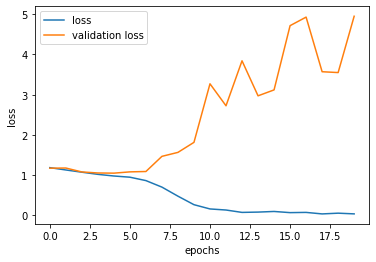

In [ ]:
plt.plot(trained.history['loss'], label="loss")
plt.plot(trained.history['val_loss'], label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

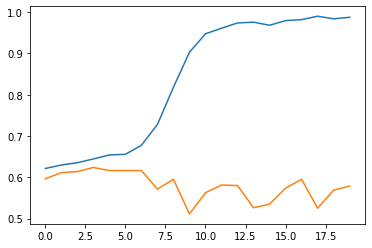

In [ ]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])


In [ ]:
#with tf.device('/cpu:0'):
print(x_test.shape)
print(y_test.shape)
print(model.evaluate(x=x_test, y=y_test))
print("DONE")

(1001, 224, 224, 3)
(1001, 5)
32/32 [==============================] - 1s 35ms/step - loss: 4.3980 - accuracy: 0.5964
[4.398038864135742, 0.5964035987854004]
DONE


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

#with tf.device('/cpu:0'):
y_hat = model.predict(x_test)
# confusion matrix
matrix = multilabel_confusion_matrix(y_test,  y_hat.round())
print('Confusion matrix : \n',matrix)
    #print(y_test)



InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()
# print("FREED")